### Curso de Python do Maurão
#### Aula 2 - Analisando uma base de dados "real" 


#####  **Objetivos:** 

 - Carga de uma base de dados coletados a partir de eventos reais
 - Fazer uma análise exploratória 
 - Análise de correlação
 - Elaboração de mapa temático

1) Imports e configuração do ambiente

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
sns.set() # notebook
pd.options.mode.chained_assignment = None

2) Carregando os dados

In [2]:
start = datetime.now()
df = pd.read_csv(r'../data/yellow_tripdata_2019-12.csv')
print(datetime.now() - start)

/opt/anaconda/anaconda3/envs/curso_datascience/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0:00:08.496392


3) Primeiras explorações

In [3]:
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.describe())
sp = df.shape

(6896317, 18)
Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')
vendorid                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
ratecodeid               float64
store_and_fwd_flag        object
pulocationid               int64
dolocationid               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object
         

4) Configurando a formatação dos números

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

5) Exibindo alguns dados

In [6]:
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.000,2019-12-01 00:26:58,2019-12-01 00:41:45,1.000,4.200,1.000,N,142,116,2.000,14.500,3.000,0.500,0.000,0.000,0.300,18.300,2.500
1,1.000,2019-12-01 00:12:08,2019-12-01 00:12:14,1.000,0.000,1.000,N,145,145,2.000,2.500,0.500,0.500,0.000,0.000,0.300,3.800,0.000
2,1.000,2019-12-01 00:25:53,2019-12-01 00:26:04,1.000,0.000,1.000,N,145,145,2.000,2.500,0.500,0.500,0.000,0.000,0.300,3.800,0.000
3,1.000,2019-12-01 00:12:03,2019-12-01 00:33:19,2.000,9.400,1.000,N,138,25,1.000,28.500,0.500,0.500,10.000,0.000,0.300,39.800,0.000
4,1.000,2019-12-01 00:05:27,2019-12-01 00:16:32,2.000,1.600,1.000,N,161,237,2.000,9.000,3.000,0.500,0.000,0.000,0.300,12.800,2.500


In [7]:
df.tail()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6896312,nan,2019-12-31 00:07:00,2019-12-31 00:46:00,nan,12.780,nan,NaN,230,72,nan,32.320,2.750,0.500,0.000,6.120,0.300,41.990,0.000
6896313,nan,2019-12-31 00:20:00,2019-12-31 00:47:00,nan,18.520,nan,NaN,219,32,nan,51.630,2.750,0.500,0.000,6.120,0.300,61.300,0.000
6896314,nan,2019-12-31 00:50:00,2019-12-31 01:21:00,nan,13.130,nan,NaN,161,76,nan,38.020,2.750,0.500,0.000,6.120,0.300,47.690,0.000
6896315,nan,2019-12-31 00:38:19,2019-12-31 01:19:37,nan,14.510,nan,NaN,230,21,nan,41.860,2.750,0.000,0.000,6.120,0.300,51.030,0.000
6896316,nan,2019-12-31 00:21:00,2019-12-31 00:56:00,nan,-17.160,nan,NaN,193,219,nan,44.620,2.750,0.500,0.000,0.000,0.300,48.170,0.000


6) Lidando com os valores não informados

In [8]:
df.columns[df.isna().any()]

Index(['vendorid', 'passenger_count', 'ratecodeid', 'store_and_fwd_flag',
       'payment_type'],
      dtype='object')

In [9]:
df = df.dropna()

In [10]:
sp[0] - df.shape[0]

51018

7) Primeiras análises

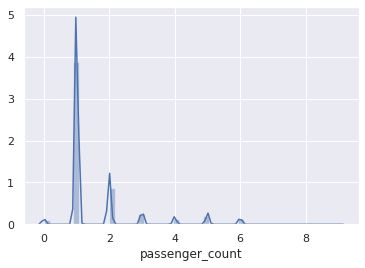

In [11]:
sns.distplot(df['passenger_count'])

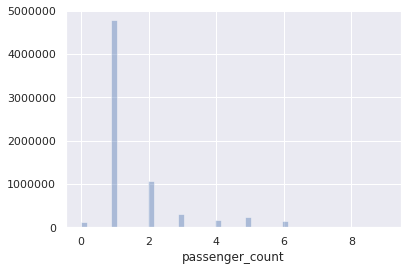

In [12]:
sns.distplot(df['passenger_count'],kde=False)

8) Consertando o tipo de dado de campos de data/hora

In [13]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [14]:
df.dtypes

vendorid                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
ratecodeid                      float64
store_and_fwd_flag               object
pulocationid                      int64
dolocationid                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

9) Criando as colunas de dias da semana

In [15]:
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name()
df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()

10) Mais algumas análises exploratórias

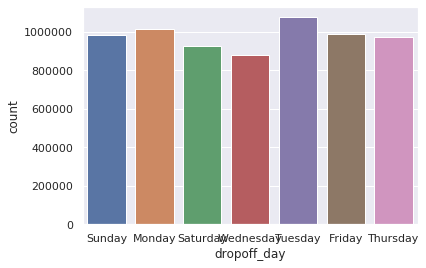

In [16]:
ax=sns.countplot(x='dropoff_day',data=df)

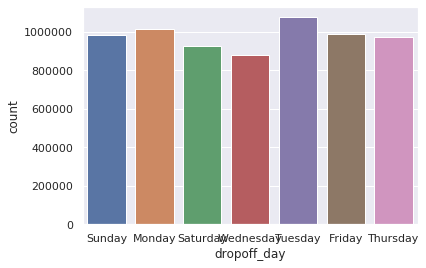

In [17]:
ax=sns.countplot(df['dropoff_day'])

Text(0.5, 1.0, 'Corridas por dia da semana')

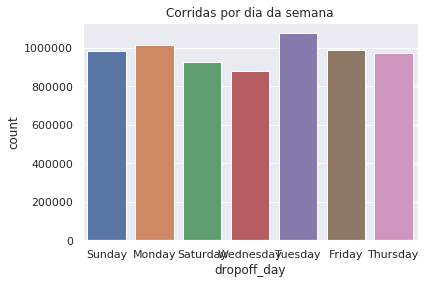

In [18]:
ax=sns.countplot(x='dropoff_day',data=df)
ax.set_title('Corridas por dia da semana')

11) Criando campos com as horas de pickup e dropoff

In [19]:
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour

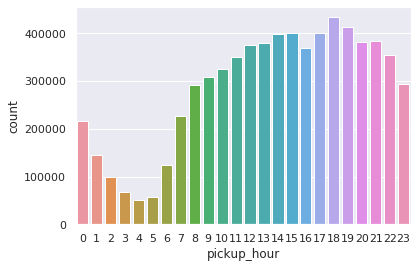

In [20]:
ax=sns.countplot(x='pickup_hour',data=df)

In [21]:
df['trip_duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [22]:
import numpy as np
df['trip_duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

12) Investigando outliers

In [23]:
print(df['trip_duration'].max())
print(df['trip_duration'].min())

6114.783333333334
-5779.466666666666


In [24]:
df[df['trip_duration'] < 0]

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,dropoff_day,pickup_day,pickup_hour,dropoff_hour,trip_duration
2036290,1.000,2019-12-09 15:53:10,2019-12-05 15:33:42,1.000,3.700,1.000,N,186,13,1.000,...,3.000,0.000,0.300,25.800,2.500,Thursday,Monday,15,15,-5779.467


In [25]:
df=df[df['trip_duration'] >= 0]

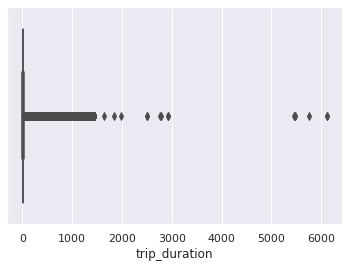

In [26]:
sns.boxplot(x=df['trip_duration'])

In [27]:
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
print(Q1,Q3)

6.783333333333333 19.3


In [28]:
df[(df['trip_duration'] < Q1) | (df['trip_duration'] > Q3)].count()

vendorid                 3414271
tpep_pickup_datetime     3414271
tpep_dropoff_datetime    3414271
passenger_count          3414271
trip_distance            3414271
ratecodeid               3414271
store_and_fwd_flag       3414271
pulocationid             3414271
dolocationid             3414271
payment_type             3414271
fare_amount              3414271
extra                    3414271
mta_tax                  3414271
tip_amount               3414271
tolls_amount             3414271
improvement_surcharge    3414271
total_amount             3414271
congestion_surcharge     3414271
dropoff_day              3414271
pickup_day               3414271
pickup_hour              3414271
dropoff_hour             3414271
trip_duration            3414271
dtype: int64

In [29]:
df=df[(df['trip_duration'] >= Q1) & (df['trip_duration'] <= Q3)]

In [30]:
df['trip_duration'].max()

19.3

13) Outros gráficos

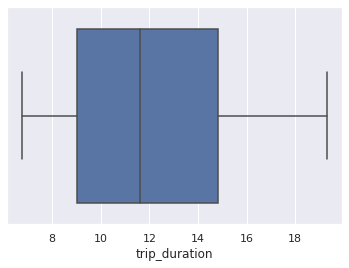

In [31]:
sns.boxplot(x=df['trip_duration'])

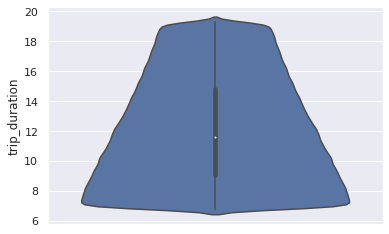

In [32]:
sns.violinplot(x=df['trip_duration'],orient='vert')

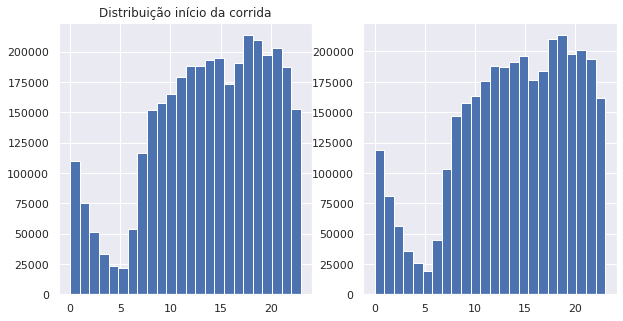

In [33]:
import matplotlib.pyplot as plt
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribuição início da corrida')
df.dropoff_hour.hist(bins=24,ax=ax[1])

14) Análise correlação

0:00:38.834008


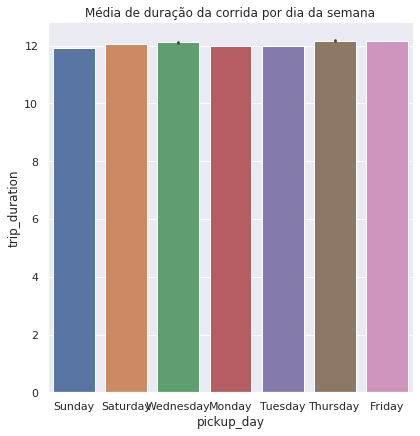

In [34]:
start = datetime.now()
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('Média de duração da corrida por dia da semana')
print(datetime.now() - start)

15) Mapas!

In [35]:
import geopandas as gpd
nyc = gpd.read_file(r'../data/nyc_taxi_zones.geojson')
nyc.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116,0.001,Newark Airport,1,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ..."
1,2,0.433,0.005,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084,0.000,Allerton/Pelham Gardens,3,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,4,0.044,0.000,Alphabet City,4,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,5,0.092,0.000,Arden Heights,5,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17348 ..."


In [36]:
txzones=df.groupby(['pulocationid']).count()

In [37]:
map = pd.merge(nyc,txzones,how='left',left_on=['LocationID'], right_on=['pulocationid'])

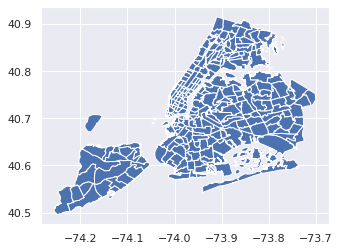

In [39]:
map.plot()

/opt/anaconda/anaconda3/envs/curso_datascience/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


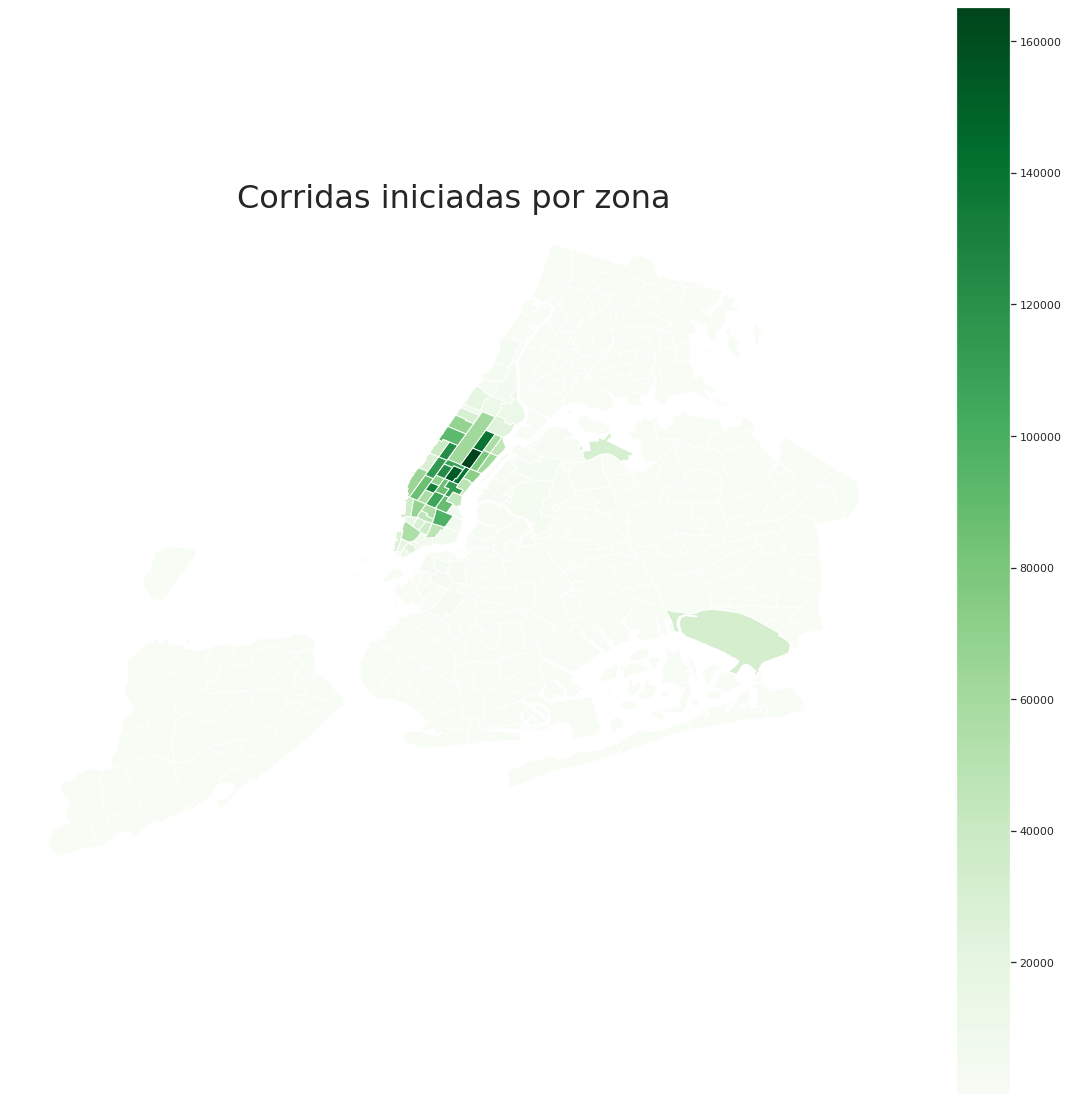

In [40]:
fig, ax = plt.subplots(1,1, figsize=(20, 20))
map.plot(column='vendorid',cmap='Greens',ax=ax)
ax.set_title('Corridas iniciadas por zona',fontsize=32)
ax.axis('off')
vmin=map['vendorid'].min()
vmax=map['vendorid'].max()
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)